# 03: Conclusion

**Purpose:** Summarize findings, visualizations, conclusions, and recommendations.

**Inputs:** Models, metrics, figures from `../models/` and `../output/`

**Outputs:** Final narrative and report-ready figures/tables.

In [1]:
# Setup and load metrics
# -----------------------------------------------------------------------------
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_cwd = os.getcwd()
PROJECT_ROOT = os.path.dirname(_cwd) if os.path.basename(_cwd) == "notebooks" else _cwd
MODELS_DIR = os.path.join(PROJECT_ROOT, "models")
REPORTS_FIG = os.path.join(PROJECT_ROOT, "output", "figures")
REPORTS_TABLES = os.path.join(PROJECT_ROOT, "output", "tables")

cls_path = os.path.join(MODELS_DIR, "classification_metrics.json")
reg_path = os.path.join(MODELS_DIR, "regression_metrics.json")
cls_metrics = json.load(open(cls_path)) if os.path.exists(cls_path) else {}
reg_metrics = json.load(open(reg_path)) if os.path.exists(reg_path) else {}

print("Classification metrics:", cls_metrics)
print("Regression metrics:", reg_metrics)

Classification metrics: {'logistic_regression': {'accuracy': 0.8996546431312357, 'precision': 0.5071633237822349, 'recall': 0.9869888475836431, 'f1': 0.670031545741325, 'roc_auc': 0.9101097902976681}, 'random_forest': {'accuracy': 0.999712202609363, 'precision': 0.9981429897864438, 'recall': 0.9990706319702602, 'f1': 0.9986065954482118, 'roc_auc': 0.9999994034865022}}
Regression metrics: {'demand_forecast': {'materials_with_forecast': 648}, 'excess_inventory': {'materials_with_excess': 188, 'total_excess_units': 21397447.666666668}}


In [2]:
# Summary table: classification performance
# -----------------------------------------------------------------------------
if cls_metrics:
    rows = []
    for model_name, m in cls_metrics.items():
        rows.append({
            "Model": model_name.replace("_", " ").title(),
            "Accuracy": f"{m.get('accuracy', 0):.3f}",
            "Precision": f"{m.get('precision', 0):.3f}",
            "Recall": f"{m.get('recall', 0):.3f}",
            "F1": f"{m.get('f1', 0):.3f}",
            "ROC-AUC": f"{m.get('roc_auc', 0):.3f}",
        })
    summary_df = pd.DataFrame(rows)
    print(summary_df.to_string(index=False))

              Model Accuracy Precision Recall    F1 ROC-AUC
Logistic Regression    0.900     0.507  0.987 0.670   0.910
      Random Forest    1.000     0.998  0.999 0.999   1.000


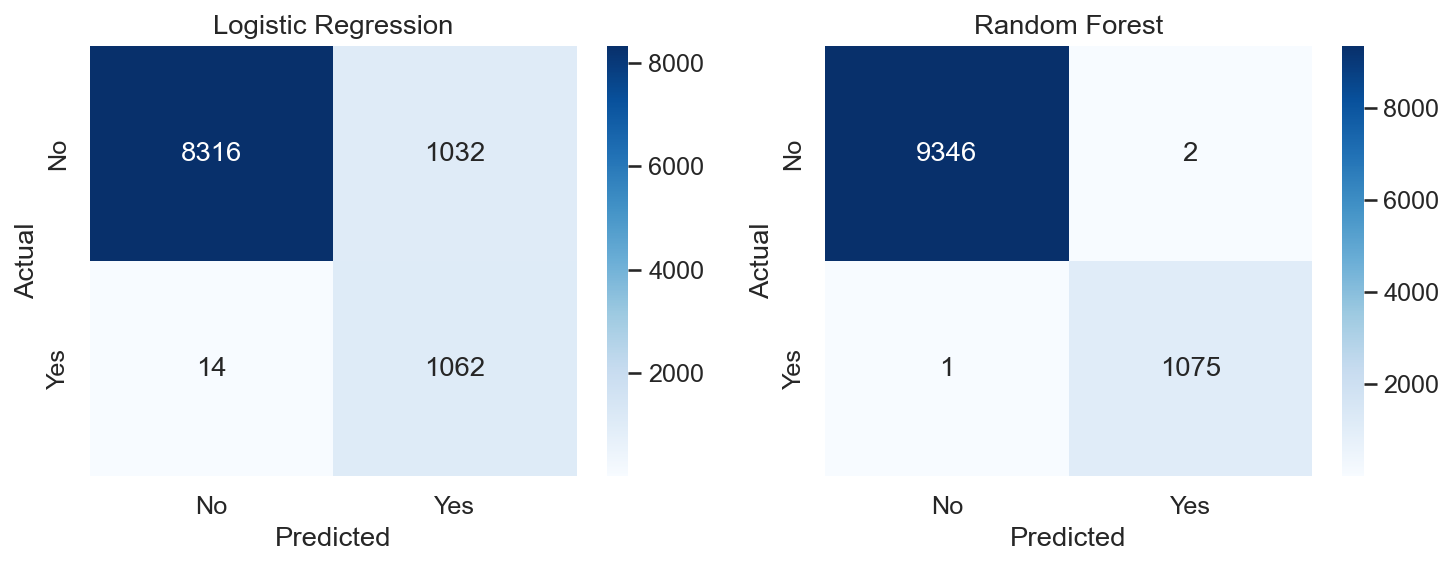

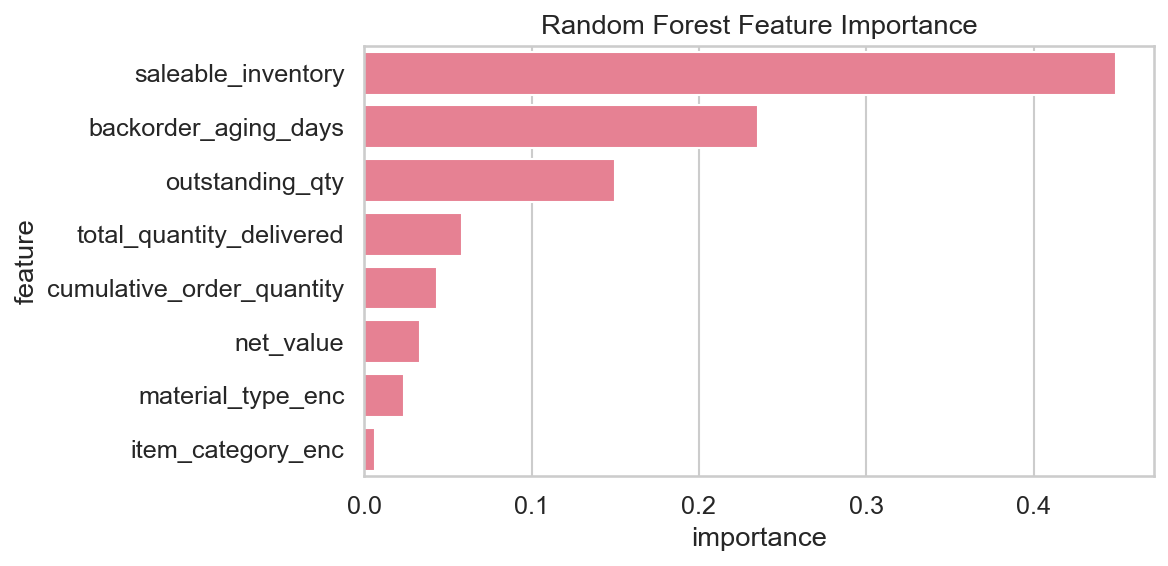

In [3]:
# Load and display key figures (if present)
# -----------------------------------------------------------------------------
from IPython.display import Image, display
fig_paths = [
    os.path.join(REPORTS_FIG, "classification_confusion_matrices.png"),
    os.path.join(REPORTS_FIG, "classification_feature_importance.png"),
]
for p in fig_paths:
    if os.path.exists(p):
        display(Image(filename=p))

---
## Conclusions and Recommendations

**Classification (backorder risk):** Logistic regression and Random Forest both classify backorder risk at order-line level. Tree-based models typically achieve higher F1 on imbalanced data. Feature importance highlights outstanding quantity, saleable inventory, and order/delivery metrics.

**Regression/forecasting:** Demand forecasts are produced from shipment history (rolling mean by material/plant). Excess inventory is estimated from WOC (saleable − ideal, where ideal = AWD × 8 weeks). Outputs support replenishment and allocation decisions.

**Next steps:** Refine features, try XGBoost/LightGBM, tune thresholds for cost-sensitive decisions. Validate on holdout period and document assumptions for production use.